In [16]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def train_and_evaluate_model_with_cv(file_name, target_variable, cv_splits):
    # Load the dataset from CSV file into a DataFrame
    df = pd.read_csv(file_name)

    # Check if the target variable is 'Yes' or 'No' and convert to 1 and 0 if needed
    if df[target_variable].dtype == 'object':
        df[target_variable] = df[target_variable].map({'Yes': 1, 'No': 0})

    for col in df.columns:
        if df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col], errors='coerce')
                df[col].fillna(0, inplace=True)
            except ValueError:
                pass  # Column contains non-numeric values

    # Use only variables with positive correlation >= 0 for training the model
    positive_correlation_variables = df.corr()[target_variable][df.corr()[target_variable] >= 0].index.tolist()
    print(positive_correlation_variables)
    # Drop target variable from the list of positive correlation variables
    positive_correlation_variables.remove(target_variable)

    # Use only selected columns for training the model
    X = df[positive_correlation_variables]
    y = df[target_variable]

    # Initialize the logistic regression model
    model = LogisticRegression(max_iter=1000)

    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=cv_splits)

    # Calculate the average accuracy score from cross-validation
    avg_accuracy = scores.mean()

    return avg_accuracy

# Example usage:
file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
target_variable = 'Churn'
cv_splits = 5  # Number of cross-validation splits
average_accuracy = train_and_evaluate_model_with_cv(file_name, target_variable, cv_splits)
print("Average Accuracy:", average_accuracy)


['SeniorCitizen', 'MonthlyCharges', 'Churn']
Average Accuracy: 0.7258266662365314


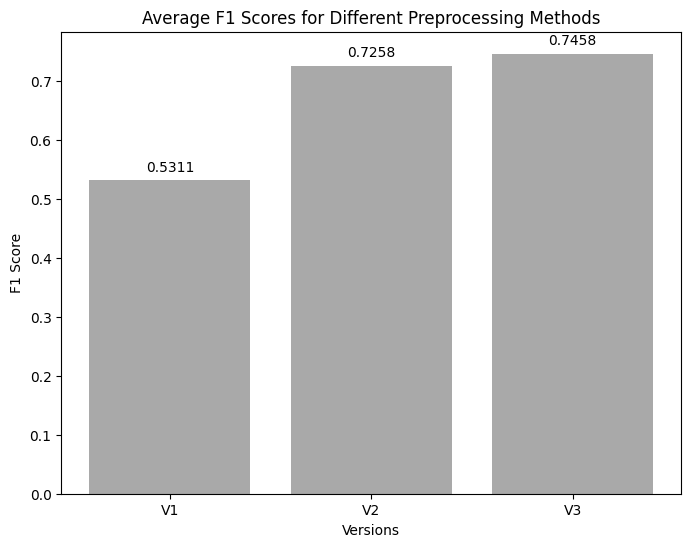

In [14]:
# F1 scores for the three versions
versions = ['V1', 'V2', 'V3']
f1_scores = [0.5311, 0.7258, 0.7458]

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(versions, f1_scores, color='darkgray')

# Add labels and title
plt.xlabel('Versions')
plt.ylabel('F1 Score')
plt.title('Average F1 Scores for Different Preprocessing Methods')

# Add scores on the bars
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()